In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_excel('Income.xlsx')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
data.columns=['Name','Age','Income']

In [5]:
data

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


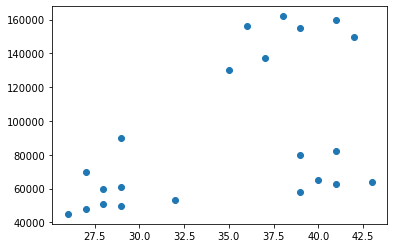

In [6]:
plt.scatter(data.Age,data.Income)

In [7]:
km=KMeans(n_clusters=3)

In [8]:
y_pred=km.fit_predict(data[['Age','Income']])

In [9]:
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
data['cluster']=y_pred

In [11]:
data.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

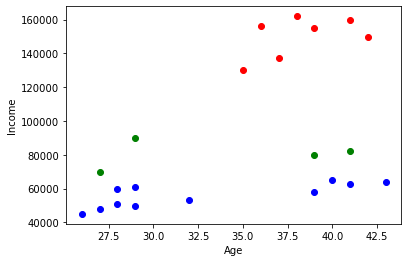

In [12]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.xlabel('Age')
plt.ylabel('Income')

In [13]:
scaler=MinMaxScaler()
scaler.fit(data[['Income']])

MinMaxScaler()

In [14]:
data['Income']=scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age']=scaler.transform(data[['Age']])
data

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [15]:
km1=KMeans(n_clusters=3)
pred1=km1.fit_predict(data[['Age','Income']])

In [16]:
km1.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [17]:
data['cluster']=pred1

Text(0, 0.5, 'Income')

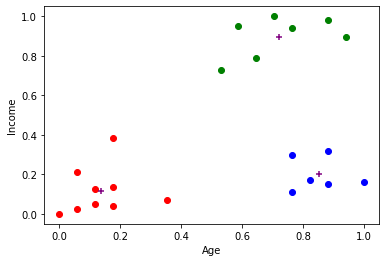

In [18]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]
plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='blue')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')